In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ROOT
%jsroot on

Welcome to JupyROOT 6.22/06


In [2]:
data = uproot.open("/eos/user/n/nkasarag/NSM_5M_TB_HGCAL_flat_pion_samples/skimmed_ntuple_sim_config22_pions_0to1M_combinedHgc_Ahc_v46.root")

In [3]:
[ i for i in data["pion_variables_v1"].pandas.df(flatten=False, entrystart=0, entrystop=1).columns]

['event',
 'run',
 'pdgID',
 'beamEnergy',
 'trueBeamEnergy',
 'isHGC_AHC_sync',
 'isGoodTrack',
 'isFHNoisy',
 'MuonVeto',
 'isInTrackWindow',
 'hgc_channel_mask',
 'ahc_channel_mask',
 'pass_noise_thres',
 'event_orig',
 'NRechits_orig',
 'combined_NRechits',
 'combined_rechits_energy',
 'combined_rechit_x',
 'combined_rechit_y',
 'combined_rechit_z',
 'NRechits',
 'rechit_energy',
 'rechit_x',
 'rechit_y',
 'rechit_z',
 'rechit_cogX',
 'rechit_cogY',
 'rechit_iu',
 'rechit_iv',
 'rechit_iU',
 'rechit_iV',
 'rechit_amplitudeHigh',
 'rechit_amplitudeLow',
 'rechit_noise_flag',
 'rechit_module',
 'rechit_layer',
 'rechit_chip',
 'rechit_channel',
 'rechit_type',
 'rechit_shower_start_layer',
 'rechit_energyPerLayer',
 'rechit_nHitsPerLayer',
 'ntracks',
 'trackChi2_X',
 'trackChi2_Y',
 'dwcReferenceType',
 'm_x',
 'm_y',
 'b_x',
 'b_y',
 'TrackImpactX_layer',
 'TrackImpactY_layer',
 'ahc_nHits',
 'ahc_nHits_orig',
 'ahc_energyPerLayer',
 'ahc_nHitsPerLayer',
 'ahc_hitI',
 'ahc_hitJ',
 

In [4]:
lst = ['rechit_x',
 'rechit_y',
 'rechit_z',
      'rechit_layer',
      'rechit_energy']
 #'rechit_chip',
 #'rechit_channel',
#      'rechit_iu',
# 'rechit_iv',
#      'rechit_iU',
# 'rechit_iV',]

In [5]:
df = data["pion_variables_v1"].pandas.df(lst, flatten=False, entrystart=0, entrystop=10000)
df.head()

,rechit_x,rechit_y,rechit_z,rechit_layer,rechit_energy
entry,,,,,
0,"[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[2.244192, 2.244192, 2.244192, 2.244192, 2.244...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 11, 11, 12...","[2.5162332, 1.6047895, 1.2331733, 1.0608839, 1..."
1,"[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.7304176, 1.0868914, 5.75599, 1.5499082, 1.2..."
2,"[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[1, 2, 3, 4, 5, 6, 7, 7, 8, 8, 9, 9, 9, 10, 10...","[0.8778861, 1.4435456, 0.94234854, 2.9853923, ..."
3,"[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[2.80524, 2.80524, 2.80524, 2.80524, 2.80524, ...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13...","[1.6653721, 1.7460003, 0.8564736, 4.001134, 0...."
4,"[-2.9152908, -2.9152908, -2.9152908, -3.887054...","[1.683144, 1.683144, 1.683144, 1.122096, 1.683...","[13.8775, 14.7675, 16.7825, 16.7825, 17.6725, ...","[1, 2, 3, 3, 4, 5, 6, 6, 7, 8, 9, 9, 10, 10, 1...","[1.45635, 6.491136, 3.557095, 7.3724494, 1.353..."


In [6]:
def x_cee(df_):
    return df_.rechit_x[df_.rechit_z<54]

def y_cee(df_):
    return df_.rechit_y[df_.rechit_z<54]

df["x_cee"] = df.apply(x_cee, axis=1)
df["y_cee"] = df.apply(y_cee, axis=1)
df.head()

,rechit_x,rechit_y,rechit_z,rechit_layer,rechit_energy,x_cee,y_cee
entry,,,,,,,
0,"[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[2.244192, 2.244192, 2.244192, 2.244192, 2.244...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 11, 11, 12...","[2.5162332, 1.6047895, 1.2331733, 1.0608839, 1...","[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[2.244192, 2.244192, 2.244192, 2.244192, 2.244..."
1,"[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.7304176, 1.0868914, 5.75599, 1.5499082, 1.2...","[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683..."
2,"[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[1, 2, 3, 4, 5, 6, 7, 7, 8, 8, 9, 9, 9, 10, 10...","[0.8778861, 1.4435456, 0.94234854, 2.9853923, ...","[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683..."
3,"[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[2.80524, 2.80524, 2.80524, 2.80524, 2.80524, ...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13...","[1.6653721, 1.7460003, 0.8564736, 4.001134, 0....","[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[2.80524, 2.80524, 2.80524, 2.80524, 2.80524, ..."
4,"[-2.9152908, -2.9152908, -2.9152908, -3.887054...","[1.683144, 1.683144, 1.683144, 1.122096, 1.683...","[13.8775, 14.7675, 16.7825, 16.7825, 17.6725, ...","[1, 2, 3, 3, 4, 5, 6, 6, 7, 8, 9, 9, 10, 10, 1...","[1.45635, 6.491136, 3.557095, 7.3724494, 1.353...","[-2.9152908, -2.9152908, -2.9152908, -3.887054...","[1.683144, 1.683144, 1.683144, 1.122096, 1.683..."


In [7]:
xy_comb = np.concatenate((np.hstack(df.x_cee.values).reshape(-1,1), np.hstack(df.y_cee.values).reshape(-1,1)), axis=1)
xy_comb

array([[-1.9435272,  2.244192 ],
       [-1.9435272,  2.244192 ],
       [-1.9435272,  2.244192 ],
       ...,
       [ 0.9717636,  2.80524  ],
       [ 0.9717636,  1.683144 ],
       [-3.8870544, -5.61048  ]], dtype=float32)

In [8]:
xy_comb.shape

(2897232, 2)

In [9]:
uni_idx = np.unique(xy_comb, axis=0)
print(uni_idx.shape)
uni_idx

(133, 2)


array([[-6.8023453, -0.561048 ],
       [-6.8023453,  0.561048 ],
       [-5.8305817, -2.244192 ],
       [-5.8305817, -1.122096 ],
       [-5.8305817,  0.       ],
       [-5.8305817,  1.122096 ],
       [-5.8305817,  2.244192 ],
       [-4.858818 , -3.9273357],
       [-4.858818 , -2.80524  ],
       [-4.858818 , -1.683144 ],
       [-4.858818 , -0.561048 ],
       [-4.858818 ,  0.561048 ],
       [-4.858818 ,  1.683144 ],
       [-4.858818 ,  2.80524  ],
       [-4.858818 ,  3.9273357],
       [-3.8870544, -5.61048  ],
       [-3.8870544, -4.488384 ],
       [-3.8870544, -3.366288 ],
       [-3.8870544, -2.244192 ],
       [-3.8870544, -1.122096 ],
       [-3.8870544,  0.       ],
       [-3.8870544,  1.122096 ],
       [-3.8870544,  2.244192 ],
       [-3.8870544,  3.366288 ],
       [-3.8870544,  4.488384 ],
       [-3.8870544,  5.61048  ],
       [-2.9152908, -6.171528 ],
       [-2.9152908, -5.049432 ],
       [-2.9152908, -3.9273357],
       [-2.9152908, -2.80524  ],
       [-2

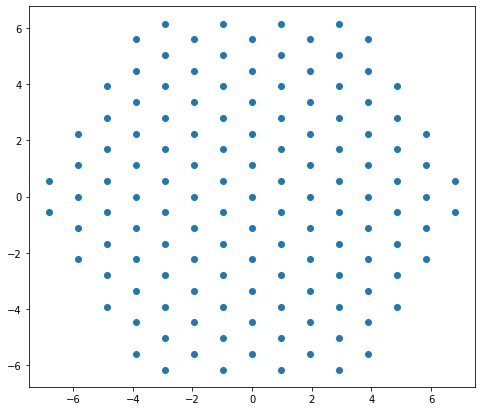

In [10]:
plt.figure(figsize=(8,7))
plt.scatter(uni_idx[:,0], uni_idx[:,1])

In [11]:
xy_comb_full = np.concatenate((np.hstack(df.rechit_x.values).reshape(-1,1), np.hstack(df.rechit_y.values).reshape(-1,1)), axis=1)
xy_comb_full

array([[ -1.9435272,   2.244192 ],
       [ -1.9435272,   2.244192 ],
       [ -1.9435272,   2.244192 ],
       ...,
       [  4.858818 ,  -3.9273357],
       [ -6.8023453, -12.904103 ],
       [  3.8870544,   1.122096 ]], dtype=float32)

In [12]:
np.unique(xy_comb_full[:,1])

array([-18.514584 , -17.953535 , -17.392487 , -16.83144  , -16.270391 ,
       -15.709343 , -15.148295 , -14.587248 , -14.026199 , -13.465152 ,
       -12.904103 , -12.343056 , -11.782007 , -11.22096  , -10.659911 ,
       -10.098864 ,  -9.537816 ,  -8.976768 ,  -8.41572  ,  -7.8546715,
        -7.293624 ,  -6.732576 ,  -6.171528 ,  -5.61048  ,  -5.049432 ,
        -4.488384 ,  -3.9273357,  -3.366288 ,  -2.80524  ,  -2.244192 ,
        -1.683144 ,  -1.122096 ,  -0.561048 ,   0.       ,   0.561048 ,
         1.122096 ,   1.683144 ,   2.244192 ,   2.80524  ,   3.366288 ,
         3.9273357,   4.488384 ,   5.049432 ,   5.61048  ,   6.171528 ,
         6.732576 ,   7.293624 ,   7.8546715,   8.41572  ,   8.976768 ,
         9.537816 ,  10.098864 ,  10.659911 ,  11.22096  ,  11.782007 ,
        12.343056 ,  12.904103 ,  13.465152 ,  14.026199 ,  14.587248 ,
        15.148295 ,  15.709343 ,  16.270391 ,  16.83144  ,  17.392487 ,
        17.953535 ,  18.514584 ], dtype=float32)

In [13]:
np.unique(xy_comb[:,1])

array([-6.171528 , -5.61048  , -5.049432 , -4.488384 , -3.9273357,
       -3.366288 , -2.80524  , -2.244192 , -1.683144 , -1.122096 ,
       -0.561048 ,  0.       ,  0.561048 ,  1.122096 ,  1.683144 ,
        2.244192 ,  2.80524  ,  3.366288 ,  3.9273357,  4.488384 ,
        5.049432 ,  5.61048  ,  6.171528 ], dtype=float32)

In [14]:
uni_idx_full = np.unique(xy_comb_full, axis=0)
uni_idx_full.shape

(868, 2)

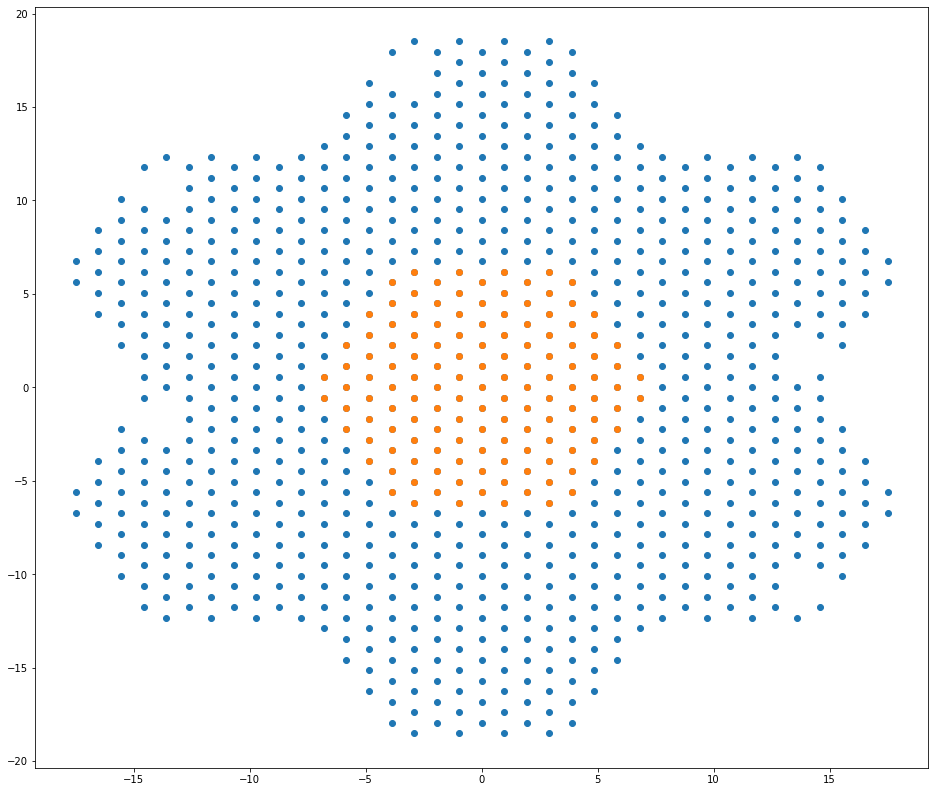

In [15]:
plt.figure(figsize=(16,14))
plt.scatter(uni_idx_full[:,0], uni_idx_full[:,1])
plt.scatter(uni_idx[:,0], uni_idx[:,1])

In [16]:
uni_idx_full.shape

(868, 2)

In [17]:
uni_idx_full[:50,:]

array([[-17.491745 ,  -6.732576 ],
       [-17.491745 ,  -5.61048  ],
       [-17.491745 ,   5.61048  ],
       [-17.491745 ,   6.732576 ],
       [-16.519981 ,  -8.41572  ],
       [-16.519981 ,  -7.293624 ],
       [-16.519981 ,  -6.171528 ],
       [-16.519981 ,  -5.049432 ],
       [-16.519981 ,  -3.9273357],
       [-16.519981 ,   3.9273357],
       [-16.519981 ,   5.049432 ],
       [-16.519981 ,   6.171528 ],
       [-16.519981 ,   7.293624 ],
       [-16.519981 ,   8.41572  ],
       [-15.548218 , -10.098864 ],
       [-15.548218 ,  -8.976768 ],
       [-15.548218 ,  -7.8546715],
       [-15.548218 ,  -6.732576 ],
       [-15.548218 ,  -5.61048  ],
       [-15.548218 ,  -4.488384 ],
       [-15.548218 ,  -3.366288 ],
       [-15.548218 ,  -2.244192 ],
       [-15.548218 ,   2.244192 ],
       [-15.548218 ,   3.366288 ],
       [-15.548218 ,   4.488384 ],
       [-15.548218 ,   5.61048  ],
       [-15.548218 ,   6.732576 ],
       [-15.548218 ,   7.8546715],
       [-15.548218 ,

In [18]:
b = np.unique(np.hstack(df.rechit_x.values))
ax=[]
for i in range(b.size-1):
    ax.append(b[i+1]-b[i])
    
np.array(ax)

array([0.9717636, 0.9717636, 0.9717636, 0.9717636, 0.9717636, 0.9717636,
       0.9717636, 0.9717636, 0.9717636, 0.9717636, 0.9717636, 0.9717636,
       0.9717636, 0.9717636, 0.9717636, 0.9717636, 0.9717636, 0.9717636,
       0.9717636, 0.9717636, 0.9717636, 0.9717636, 0.9717636, 0.9717636,
       0.9717636, 0.9717636, 0.9717636, 0.9717636, 0.9717636, 0.9717636,
       0.9717636, 0.9717636, 0.9717636, 0.9717636, 0.9717636, 0.9717636],
      dtype=float32)

In [19]:
b = np.unique(np.hstack(df.rechit_y.values))
ay=[]
for i in range(b.size-1):
    ay.append(b[i+1]-b[i])
    
np.array(ay)

array([0.5610485 , 0.5610485 , 0.5610466 , 0.5610485 , 0.5610485 ,
       0.56104755, 0.56104755, 0.5610485 , 0.56104755, 0.5610485 ,
       0.56104755, 0.5610485 , 0.56104755, 0.5610485 , 0.56104755,
       0.56104755, 0.5610485 , 0.56104755, 0.5610485 , 0.56104755,
       0.56104803, 0.56104803, 0.56104803, 0.56104803, 0.56104803,
       0.56104803, 0.5610478 , 0.56104803, 0.56104803, 0.5610479 ,
       0.56104803, 0.561048  , 0.561048  , 0.561048  , 0.561048  ,
       0.56104803, 0.5610479 , 0.56104803, 0.56104803, 0.5610478 ,
       0.56104803, 0.56104803, 0.56104803, 0.56104803, 0.56104803,
       0.56104803, 0.56104755, 0.5610485 , 0.56104755, 0.5610485 ,
       0.56104755, 0.56104755, 0.5610485 , 0.56104755, 0.5610485 ,
       0.56104755, 0.5610485 , 0.56104755, 0.5610485 , 0.56104755,
       0.56104755, 0.5610485 , 0.5610485 , 0.5610466 , 0.5610485 ,
       0.5610485 ], dtype=float32)

In [20]:
x = np.unique(np.hstack(df.rechit_x.values))
x

array([-17.491745 , -16.519981 , -15.548218 , -14.576454 , -13.604691 ,
       -12.632927 , -11.661163 , -10.6894   ,  -9.717636 ,  -8.7458725,
        -7.774109 ,  -6.8023453,  -5.8305817,  -4.858818 ,  -3.8870544,
        -2.9152908,  -1.9435272,  -0.9717636,   0.       ,   0.9717636,
         1.9435272,   2.9152908,   3.8870544,   4.858818 ,   5.8305817,
         6.8023453,   7.774109 ,   8.7458725,   9.717636 ,  10.6894   ,
        11.661163 ,  12.632927 ,  13.604691 ,  14.576454 ,  15.548218 ,
        16.519981 ,  17.491745 ], dtype=float32)

In [21]:
y = np.unique(np.hstack(df.rechit_y.values))
y

array([-18.514584 , -17.953535 , -17.392487 , -16.83144  , -16.270391 ,
       -15.709343 , -15.148295 , -14.587248 , -14.026199 , -13.465152 ,
       -12.904103 , -12.343056 , -11.782007 , -11.22096  , -10.659911 ,
       -10.098864 ,  -9.537816 ,  -8.976768 ,  -8.41572  ,  -7.8546715,
        -7.293624 ,  -6.732576 ,  -6.171528 ,  -5.61048  ,  -5.049432 ,
        -4.488384 ,  -3.9273357,  -3.366288 ,  -2.80524  ,  -2.244192 ,
        -1.683144 ,  -1.122096 ,  -0.561048 ,   0.       ,   0.561048 ,
         1.122096 ,   1.683144 ,   2.244192 ,   2.80524  ,   3.366288 ,
         3.9273357,   4.488384 ,   5.049432 ,   5.61048  ,   6.171528 ,
         6.732576 ,   7.293624 ,   7.8546715,   8.41572  ,   8.976768 ,
         9.537816 ,  10.098864 ,  10.659911 ,  11.22096  ,  11.782007 ,
        12.343056 ,  12.904103 ,  13.465152 ,  14.026199 ,  14.587248 ,
        15.148295 ,  15.709343 ,  16.270391 ,  16.83144  ,  17.392487 ,
        17.953535 ,  18.514584 ], dtype=float32)

In [22]:
cell_map = [[-16.51998, -8.41572, 0],
[-16.51998, -7.29362, 0],
[-17.49174, -6.73258, 0],
[-16.51998, -6.17153, 0],
[-17.49174, -5.61048, 0],
[-16.51998, -5.04943, 0],
[-16.51998, -3.92734, 0],
[-16.51998, 3.92734, 1],
[-16.51998, 5.04943, 1],
[-17.49174, 5.61048, 1],
[-16.51998, 6.17153, 1],
[-17.49174, 6.73258, 1],
[-16.51998, 7.29362, 1],
[-16.51998, 8.41572, 1]]

print(cell_map, "\n")

i=(2*4)

for x_idx in range(2, 36, 2):

    x1 = x[x_idx]
    x2 = x[x_idx+1]

    xy_vals = np.concatenate((uni_idx_full[uni_idx_full[:,0]==x1], uni_idx_full[uni_idx_full[:,0]==x2]), axis=0)
    xy_vals_sorted = xy_vals[xy_vals[:, 1].argsort()]

    int_reduced_cells = int(xy_vals_sorted.shape[0]/4)


    #i=int(i/4)+1
    

    for cells in range(xy_vals_sorted.shape[0]):
        cell_map.append( list(xy_vals_sorted[cells]) + [int(i/4)] )
        
        print( list(xy_vals_sorted[cells]) + [int(i/4)])#, i])
        
        i+=1
        
    print("\n")
    if i%4>0 : i+=(4-i%4)

cell_map = np.array(cell_map + [[17.49174, -6.73258, 222], [17.49174, -5.61048, 222], [17.49174,  5.61048, 223], [17.49174,  6.73258, 223]]).round(5)

[[-16.51998, -8.41572, 0], [-16.51998, -7.29362, 0], [-17.49174, -6.73258, 0], [-16.51998, -6.17153, 0], [-17.49174, -5.61048, 0], [-16.51998, -5.04943, 0], [-16.51998, -3.92734, 0], [-16.51998, 3.92734, 1], [-16.51998, 5.04943, 1], [-17.49174, 5.61048, 1], [-16.51998, 6.17153, 1], [-17.49174, 6.73258, 1], [-16.51998, 7.29362, 1], [-16.51998, 8.41572, 1]] 

[-14.576454, -11.782007, 2]
[-14.576454, -10.659911, 2]
[-15.548218, -10.098864, 2]
[-14.576454, -9.537816, 2]
[-15.548218, -8.976768, 3]
[-14.576454, -8.41572, 3]
[-15.548218, -7.8546715, 3]
[-14.576454, -7.293624, 3]
[-15.548218, -6.732576, 4]
[-14.576454, -6.171528, 4]
[-15.548218, -5.61048, 4]
[-14.576454, -5.049432, 4]
[-15.548218, -4.488384, 5]
[-14.576454, -3.9273357, 5]
[-15.548218, -3.366288, 5]
[-14.576454, -2.80524, 5]
[-15.548218, -2.244192, 6]
[-14.576454, -0.561048, 6]
[-14.576454, 0.561048, 6]
[-14.576454, 1.683144, 6]
[-15.548218, 2.244192, 7]
[-14.576454, 2.80524, 7]
[-15.548218, 3.366288, 7]
[-14.576454, 3.9273357,

In [23]:
    
    
    x1 = x[-1]

    xy_vals = uni_idx_full[uni_idx_full[:,0]==x1]
    xy_vals_sorted = xy_vals[xy_vals[:, 1].argsort()]

    xy_vals_sorted

array([[17.491745, -6.732576],
       [17.491745, -5.61048 ],
       [17.491745,  5.61048 ],
       [17.491745,  6.732576]], dtype=float32)

In [24]:
cell_map.shape

(868, 3)

In [25]:
cell_map

array([[-16.51998,  -8.41572,   0.     ],
       [-16.51998,  -7.29362,   0.     ],
       [-17.49174,  -6.73258,   0.     ],
       ...,
       [ 17.49174,  -5.61048, 222.     ],
       [ 17.49174,   5.61048, 223.     ],
       [ 17.49174,   6.73258, 223.     ]])

In [26]:
new_xy_cell = []

for i in range(int(cell_map[-1,-1])+1):
    
    xy_map = cell_map[cell_map[:, 2]==i]
    
    new_xy_cell.append([np.mean((xy_map[:,0])), np.mean((xy_map[:,1])), xy_map[-1,-1]])
    
new_xy_cell = np.array(new_xy_cell).round(5)
new_xy_cell

array([[-1.679763e+01, -6.171530e+00,  0.000000e+00],
       [-1.679763e+01,  6.171530e+00,  1.000000e+00],
       [-1.481939e+01, -1.051965e+01,  2.000000e+00],
       [-1.506234e+01, -8.135200e+00,  3.000000e+00],
       [-1.506234e+01, -5.891000e+00,  4.000000e+00],
       [-1.506234e+01, -3.646810e+00,  5.000000e+00],
       [-1.481939e+01, -1.402600e-01,  6.000000e+00],
       [-1.506234e+01,  3.085770e+00,  7.000000e+00],
       [-1.506234e+01,  5.329960e+00,  8.000000e+00],
       [-1.506234e+01,  7.574150e+00,  9.000000e+00],
       [-1.506234e+01,  1.009886e+01,  1.000000e+01],
       [-1.311881e+01, -1.150148e+01,  1.100000e+01],
       [-1.311881e+01, -9.257290e+00,  1.200000e+01],
       [-1.311881e+01, -7.013100e+00,  1.300000e+01],
       [-1.311881e+01, -4.768910e+00,  1.400000e+01],
       [-1.287587e+01, -2.103930e+00,  1.500000e+01],
       [-1.311881e+01,  8.415700e-01,  1.600000e+01],
       [-1.311881e+01,  3.085770e+00,  1.700000e+01],
       [-1.311881e+01,  5.32

In [27]:
new_xy_cell[new_xy_cell[:,2]==154][0][1]

14.86777

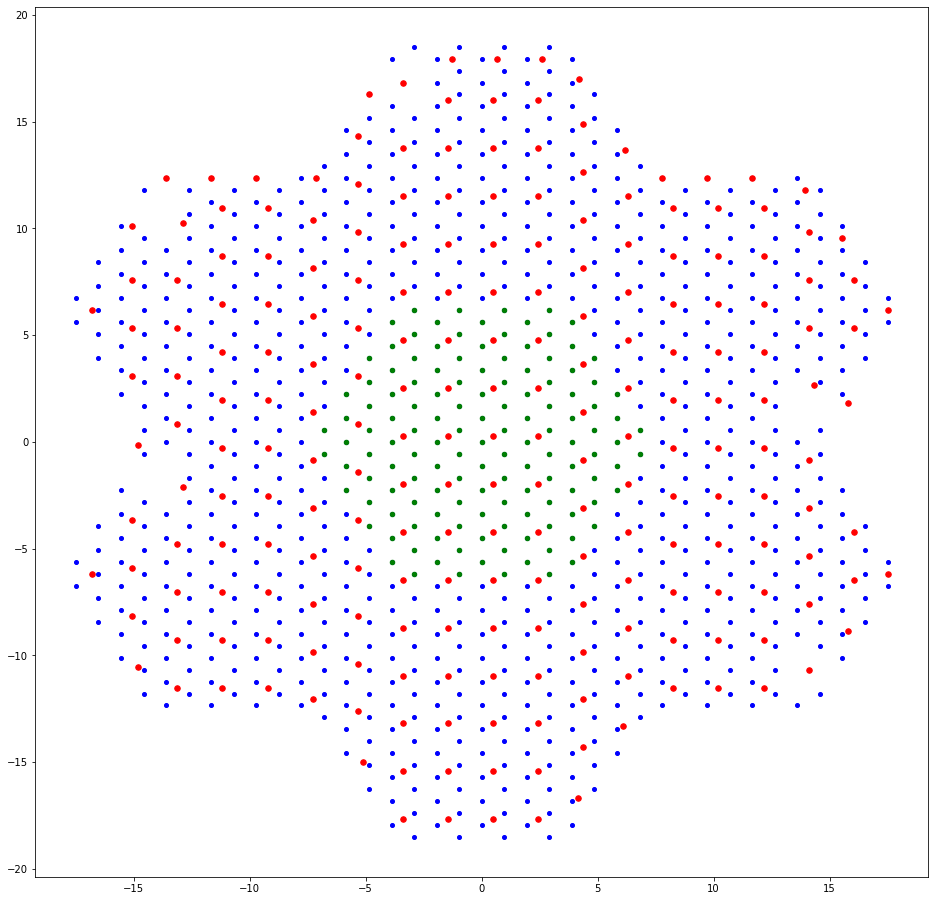

In [28]:
plt.figure(figsize=(16,16))
plt.plot(uni_idx_full[:,0], uni_idx_full[:,1], ".b", markersize=8)
plt.plot(uni_idx[:,0], uni_idx[:,1], ".g", markersize=9)
plt.plot(new_xy_cell[:,0], new_xy_cell[:,1], ".r", markersize=11)

In [29]:
df.rechit_x.values[0].round(5)

array([ -1.94353,  -1.94353,  -1.94353,  -1.94353,  -1.94353,  -1.94353,
        -1.94353,  -1.94353,  -1.94353,  -1.94353,  -0.97176,  -1.94353,
        -1.94353,  -1.94353,  -1.94353,  -1.94353,  -0.97176,  -1.94353,
         0.     ,  -1.94353,  -1.94353,  -1.94353,  -1.94353,  -1.94353,
        -1.94353,  -1.94353,  -1.94353,  -1.94353,  -1.94353,  -1.94353,
        -1.94353,  -1.94353,  -1.94353,  -1.94353,  -1.94353,  -5.83058,
        -8.74587,   0.     ,   0.     ,   0.     ,  -0.97176,  -0.97176,
        -0.97176,  -0.97176,  -1.94353,  -1.94353,  -1.94353,  -2.91529,
        -2.91529,  -2.91529,  -2.91529,  -2.91529,  -3.88705,  -3.88705,
        -3.88705,  -4.85882,  -4.85882,  -4.85882,   3.88705,   2.91529,
         0.97176,   0.97176,   0.     ,   0.97176,   0.97176,  -2.91529,
         0.97176,  -4.85882,   3.88705,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,  -0.97176,  -0.97176,  -0.97176,  -0.97176,
        -0.97176,  -1.94353,  -1.94353,  -1.94353, 

In [30]:
def new_rechits(df_):
    
    new_cell_idxs = []
    new_rechit_x = []
    new_rechit_y = []
    new_rechit_z = []
    new_rechit_ene = []
    new_rechit_lay = []
    
    rec_lay = df_.rechit_layer
    
    for lay in range(1,41):
    
        rec_x = df_.rechit_x[rec_lay==lay]
        rec_y = df_.rechit_y[rec_lay==lay]
        rec_z = df_.rechit_z[rec_lay==lay]
        rec_ene = df_.rechit_energy[rec_lay==lay]
        
        new_cell_idxs = []

        for rec_i in range(rec_x.size):


            xy_array = np.array(np.array([rec_x[rec_i], rec_y[rec_i]]).tolist()).round(5)
            #print(xy_array)


            cell_idx = cell_map[:,2][(cell_map[:,0:2]==xy_array).all(axis=1)][0]
            #print(cell_idx,"\n")


            if cell_idx not in new_cell_idxs:

                new_cell_idxs.append(cell_idx)

                new_rechit_x.append(new_xy_cell[new_xy_cell[:,2]==cell_idx][0][0])
                new_rechit_y.append(new_xy_cell[new_xy_cell[:,2]==cell_idx][0][1])
                new_rechit_z.append(rec_z[rec_i])
                new_rechit_ene.append(rec_ene[rec_i])
                new_rechit_lay.append(lay)

            else: new_rechit_ene[new_cell_idxs.index(cell_idx)] += rec_ene[rec_i]
            
    
    
    return [np.array(new_rechit_x), np.array(new_rechit_y), np.array(new_rechit_z), np.array(new_rechit_ene), np.array(new_cell_idxs), np.array(new_rechit_lay)]
            
              

In [31]:
df_dummy = df.head(500)
df_dummy

,rechit_x,rechit_y,rechit_z,rechit_layer,rechit_energy,x_cee,y_cee
entry,,,,,,,
0,"[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[2.244192, 2.244192, 2.244192, 2.244192, 2.244...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 11, 11, 12...","[2.5162332, 1.6047895, 1.2331733, 1.0608839, 1...","[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[2.244192, 2.244192, 2.244192, 2.244192, 2.244..."
1,"[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.7304176, 1.0868914, 5.75599, 1.5499082, 1.2...","[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683..."
2,"[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[1, 2, 3, 4, 5, 6, 7, 7, 8, 8, 9, 9, 9, 10, 10...","[0.8778861, 1.4435456, 0.94234854, 2.9853923, ...","[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683..."
3,"[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[2.80524, 2.80524, 2.80524, 2.80524, 2.80524, ...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13...","[1.6653721, 1.7460003, 0.8564736, 4.001134, 0....","[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[2.80524, 2.80524, 2.80524, 2.80524, 2.80524, ..."
4,"[-2.9152908, -2.9152908, -2.9152908, -3.887054...","[1.683144, 1.683144, 1.683144, 1.122096, 1.683...","[13.8775, 14.7675, 16.7825, 16.7825, 17.6725, ...","[1, 2, 3, 3, 4, 5, 6, 6, 7, 8, 9, 9, 10, 10, 1...","[1.45635, 6.491136, 3.557095, 7.3724494, 1.353...","[-2.9152908, -2.9152908, -2.9152908, -3.887054...","[1.683144, 1.683144, 1.683144, 1.122096, 1.683..."
5,"[-2.9152908, -4.858818, -0.9717636, -2.9152908...","[2.80524, -1.683144, 2.80524, 2.80524, 1.12209...","[13.8775, 13.8775, 14.7675, 14.7675, 14.7675, ...","[1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, ...","[0.9141382, 2.8422582, 2.3824828, 1.482368, 9....","[-2.9152908, -4.858818, -0.9717636, -2.9152908...","[2.80524, -1.683144, 2.80524, 2.80524, 1.12209..."
6,"[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.0967482, 1.4345188, 0.7463287, 0.83292055, ...","[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683..."
7,"[-2.9152908, -2.9152908, -2.9152908, -3.887054...","[1.683144, 1.683144, 1.683144, 1.122096, 1.122...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 11, 11, 11...","[1.3142811, 0.76052576, 1.2786226, 0.776341, 0...","[-2.9152908, -2.9152908, -2.9152908, -3.887054...","[1.683144, 1.683144, 1.683144, 1.122096, 1.122..."
8,"[3.8870544, 4.858818, 10.6894, 4.858818, 10.68...","[4.488384, 5.049432, -10.659911, 5.049432, -10...","[32.3975, 64.6185, 64.6185, 71.326, 71.326, 78...","[14, 29, 29, 30, 30, 31, 31, 31, 31, 31, 32, 3...","[12.605197, 3.871702, 0.9873289, 0.91751915, 1...",[3.8870544],[4.488384]


In [32]:
import time

a=time.time()

new_rechit_values = df_dummy.apply(new_rechits, axis=1)
print(time.time()-a)

#df_dummy["new_rechit_x"] = new_rechit_values[0][0]
#df_dummy["new_rechit_y"] = new_rechit_values[0][1]
#df_dummy["new_rechit_z"] = new_rechit_values[0][2]
#df_dummy["new_rechit_energy"] = new_rechit_values[0][3]

#df_dummy["new_cell_idxs"] = new_rechit_values[0][4]

df_dummy.head()

17.226188898086548


,rechit_x,rechit_y,rechit_z,rechit_layer,rechit_energy,x_cee,y_cee
entry,,,,,,,
0,"[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[2.244192, 2.244192, 2.244192, 2.244192, 2.244...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 11, 11, 12...","[2.5162332, 1.6047895, 1.2331733, 1.0608839, 1...","[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[2.244192, 2.244192, 2.244192, 2.244192, 2.244..."
1,"[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.7304176, 1.0868914, 5.75599, 1.5499082, 1.2...","[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683..."
2,"[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[1, 2, 3, 4, 5, 6, 7, 7, 8, 8, 9, 9, 9, 10, 10...","[0.8778861, 1.4435456, 0.94234854, 2.9853923, ...","[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683..."
3,"[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[2.80524, 2.80524, 2.80524, 2.80524, 2.80524, ...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13...","[1.6653721, 1.7460003, 0.8564736, 4.001134, 0....","[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[2.80524, 2.80524, 2.80524, 2.80524, 2.80524, ..."
4,"[-2.9152908, -2.9152908, -2.9152908, -3.887054...","[1.683144, 1.683144, 1.683144, 1.122096, 1.683...","[13.8775, 14.7675, 16.7825, 16.7825, 17.6725, ...","[1, 2, 3, 3, 4, 5, 6, 6, 7, 8, 9, 9, 10, 10, 1...","[1.45635, 6.491136, 3.557095, 7.3724494, 1.353...","[-2.9152908, -2.9152908, -2.9152908, -3.887054...","[1.683144, 1.683144, 1.683144, 1.122096, 1.683..."


(array([ 1.,  3.,  2.,  7.,  9.,  8.,  6.,  6.,  8.,  6.,  3.,  6.,  8.,
         9.,  7., 11., 11., 11.,  8.,  6., 10.,  7.,  5., 12., 10., 12.,
         8.,  8., 14.,  8.,  8.,  9., 13., 10.,  3.,  4.,  7., 10., 13.,
         5.,  5.,  7.,  7.,  8.,  6.,  4.,  6.,  5.,  5.,  5.,  6.,  4.,
         7.,  6.,  9.,  5.,  9.,  2.,  3.,  5.,  4.,  5.,  6.,  4.,  4.,
         4.,  5.,  1.,  3.,  2.,  2.,  1.,  1.,  4.,  2.,  1.,  3.,  2.,
         4.,  2.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,  1.,  2.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  30.  ,   45.85,   61.7 ,   77.55,   93.4 ,  109.25,  125.1 ,
         140.95,  156.8 ,  172.65,  188.5 ,  204.35,  220.2 ,  236.05,
         251.9 ,  267.75,  283.6 ,  299.45,  315.3 ,  331.15,  347.  ,
         362.85,  378.7 ,  394.55,  410.4 ,  426.25,  442.1 ,  457.95,
         473.8 ,  489.65,  505.5 ,  521.35,  537.2 ,  553.05,  568.9 ,
         584.75,  600.6 ,  616.45,  632.3 ,  648.15,  664.  ,  679.85,
        

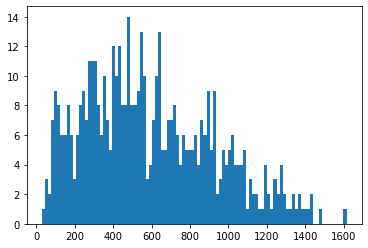

In [33]:
plt.hist(df_dummy.rechit_x.map(lambda x : x.size), bins=100)

(array([ 1.,  0.,  2.,  1.,  2.,  5.,  6., 14.,  7.,  2.,  3.,  7.,  4.,
         5.,  7., 12.,  5.,  5., 10.,  5., 13., 10., 11.,  4.,  6.,  4.,
         7.,  8., 12., 11.,  8.,  6., 14.,  6., 10.,  8.,  6.,  9.,  8.,
         5.,  9.,  8.,  6., 11.,  7.,  5.,  5.,  7.,  8.,  6.,  7.,  5.,
         7.,  5.,  4.,  7.,  7.,  2.,  5.,  8.,  7.,  5.,  8.,  4.,  6.,
         7.,  9.,  4.,  3.,  1.,  4.,  5.,  6.,  3.,  3.,  3.,  1.,  1.,
         4.,  4.,  0.,  1.,  1.,  2.,  1.,  1.,  4.,  0.,  1.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 22.  ,  30.65,  39.3 ,  47.95,  56.6 ,  65.25,  73.9 ,  82.55,
         91.2 ,  99.85, 108.5 , 117.15, 125.8 , 134.45, 143.1 , 151.75,
        160.4 , 169.05, 177.7 , 186.35, 195.  , 203.65, 212.3 , 220.95,
        229.6 , 238.25, 246.9 , 255.55, 264.2 , 272.85, 281.5 , 290.15,
        298.8 , 307.45, 316.1 , 324.75, 333.4 , 342.05, 350.7 , 359.35,
        368.  , 376.65, 385.3 , 393.95, 402.6 , 411.25, 419.9 , 428.55,
  

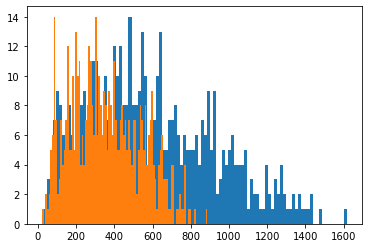

In [34]:
a=[]
for i in range(new_rechit_values.size):
    a.append(new_rechit_values[i][0].size)
    
plt.hist(df_dummy.rechit_x.map(lambda x : x.size), bins=100)
plt.hist(a, bins=100)

In [35]:
(448*5*10)/60/60

6.222222222222222

In [36]:
(2.3635272*100000)/60/60

65.65353333333333

In [37]:
new_rechit_values.size

500

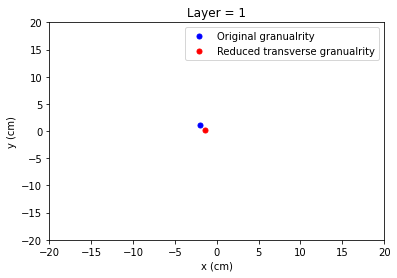

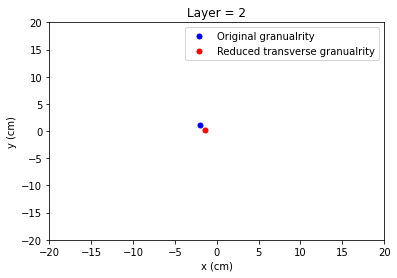

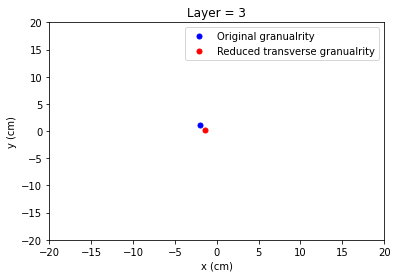

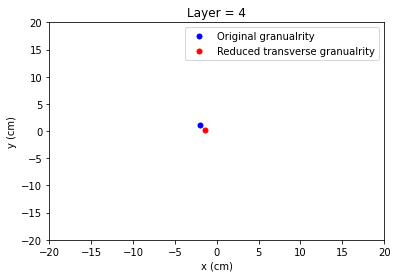

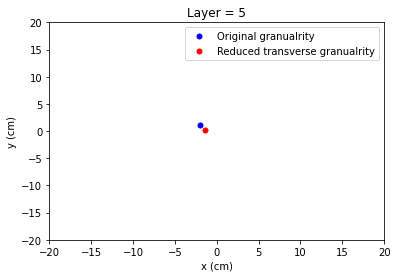

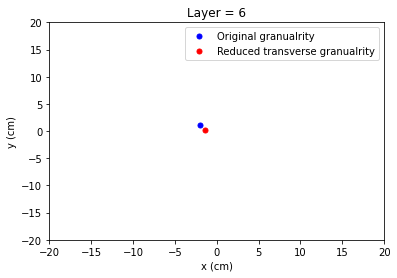

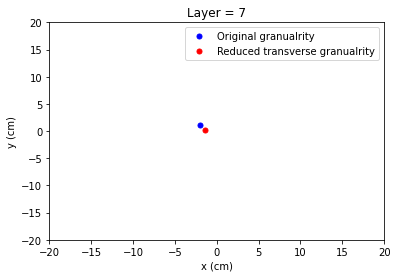

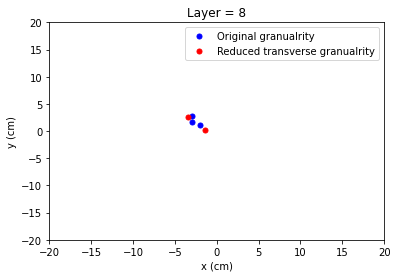

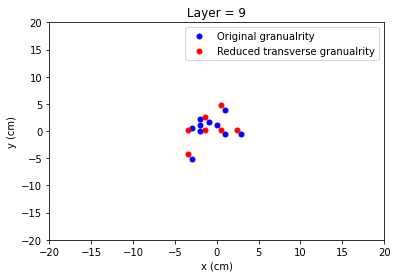

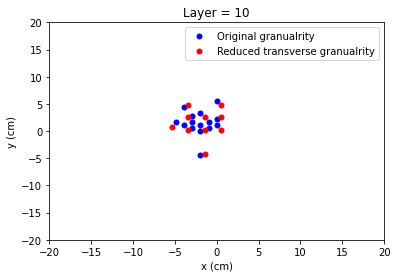

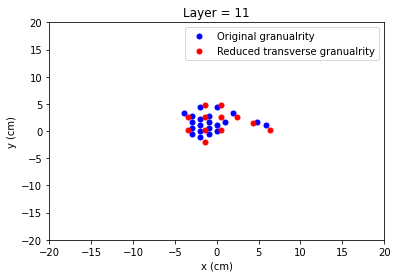

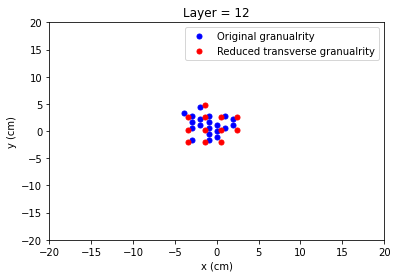

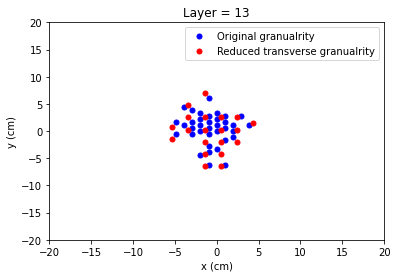

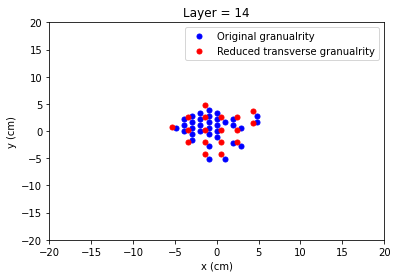

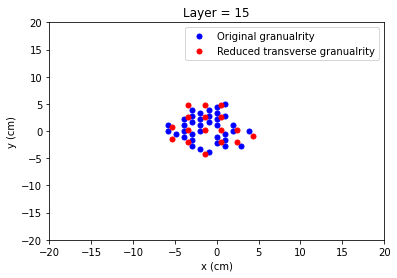

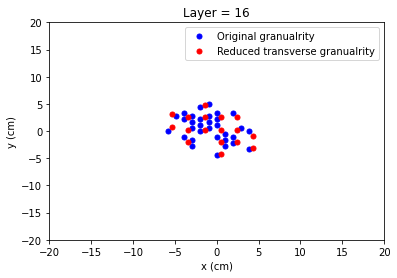

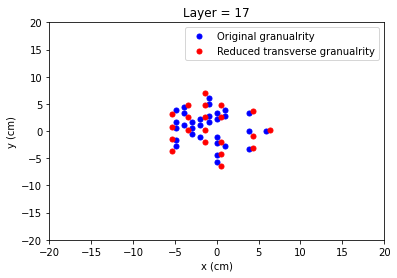

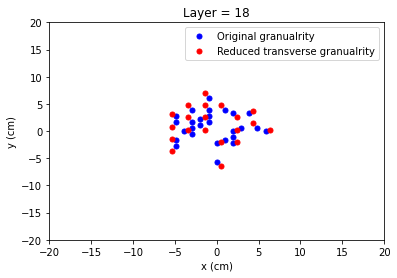

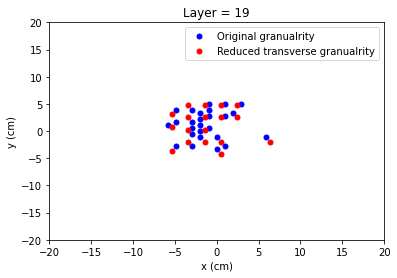

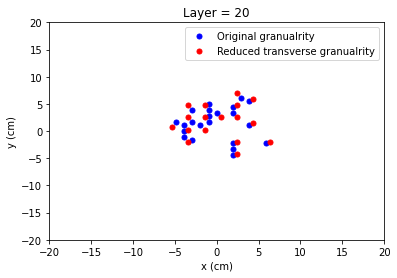

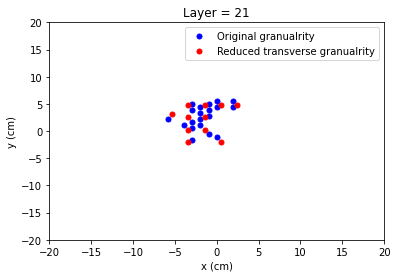

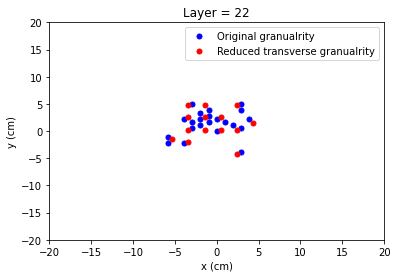

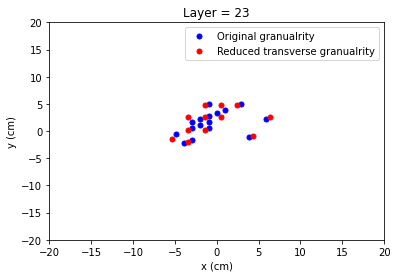

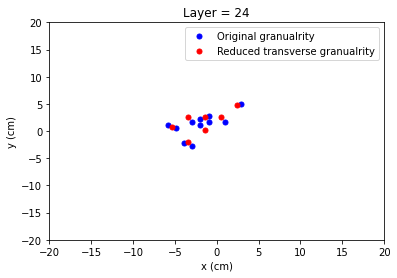

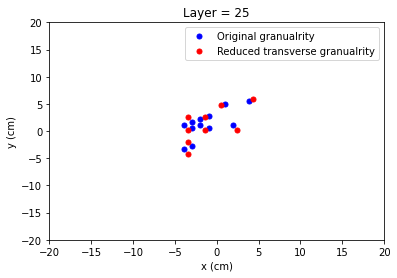

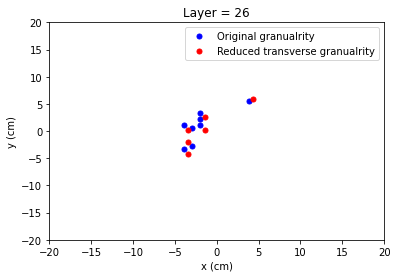

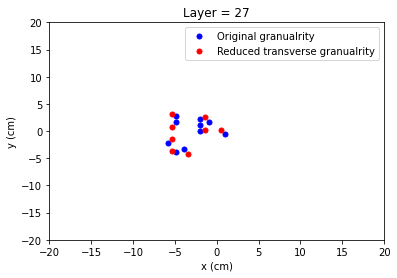

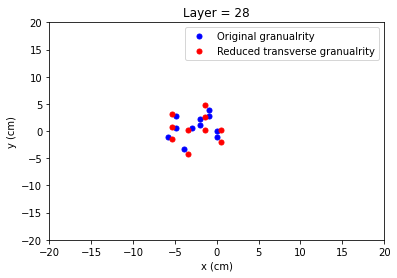

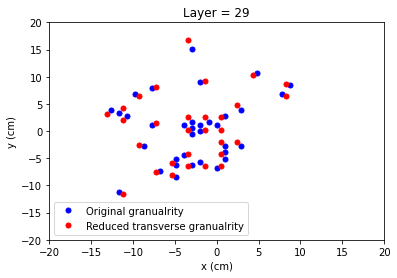

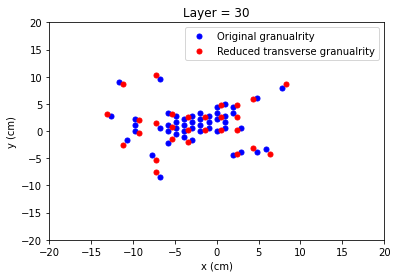

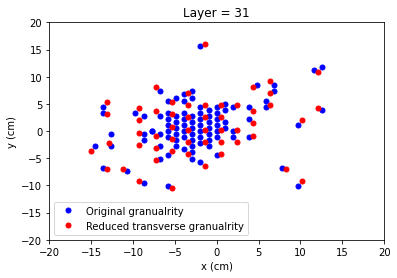

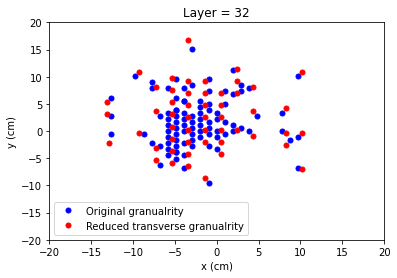

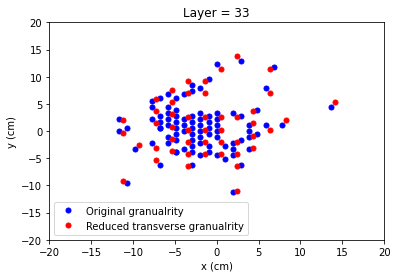

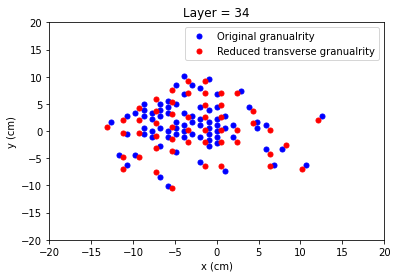

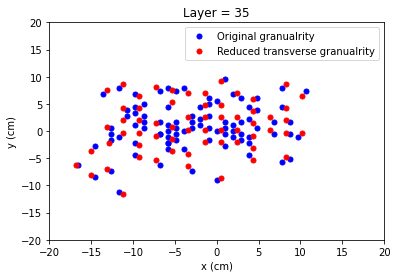

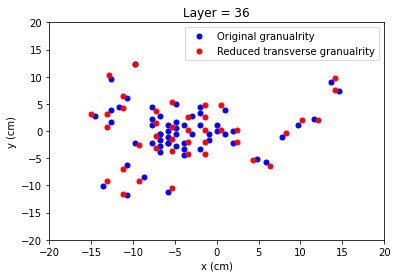

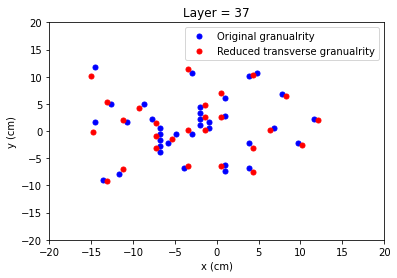

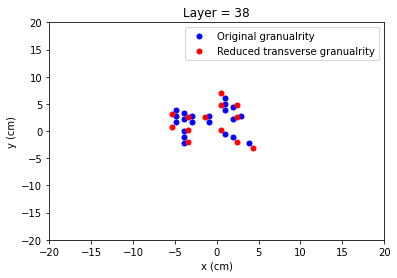

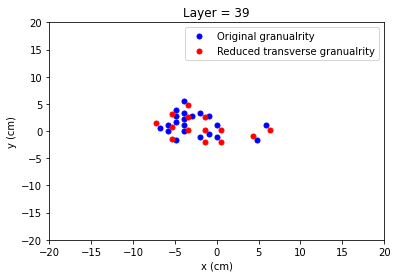

In [38]:
n=16#13#4
event = new_rechit_values[n]

z_lay = df_dummy.rechit_layer.values[n]
z_lay_new = event[5]

for lay in range(1,40):
    
    x_ori = df_dummy.rechit_x.values[n][z_lay==lay]
    y_ori = df_dummy.rechit_y.values[n][z_lay==lay]
    
    x_reduced = event[0][z_lay_new==lay]
    y_reduced = event[1][z_lay_new==lay]    
    
    plt.plot(x_ori, y_ori, ".b", markersize=10, label="Original granualrity")
    plt.plot(x_reduced, y_reduced, ".r", markersize=10, label="Reduced transverse granualrity")
    plt.legend()
    
    plt.xlim([-20,20])
    plt.ylim([-20,20])
    
    plt.xlabel('x (cm)')
    plt.ylabel('y (cm)')
    
    plt.title("Layer = %s"%str(lay))
    
    plt.show()

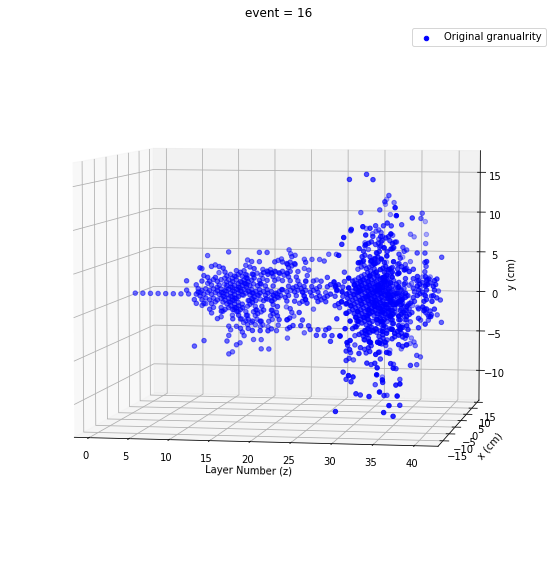

In [39]:
for i in range(16,17):#(new_rechit_values.size):

    fig = plt.figure(figsize = (15, 10)) 

    ax = plt.axes(projection ="3d") 
    ax.view_init(elev=5,azim=-80)  

    z_ori = df_dummy.rechit_layer.values[i]
    x_ori = df_dummy.rechit_x.values[i]
    y_ori = df_dummy.rechit_y.values[i]
    
    z_reduced = new_rechit_values[i][-1]
    x_reduced = new_rechit_values[i][0]
    y_reduced = new_rechit_values[i][1]
    

    ax.scatter3D(z_ori, x_ori, y_ori, color = "blue",label="Original granualrity")

    #ax.scatter3D(z_reduced, x_reduced, y_reduced, color = "red",label="Reduced transverse granualrity")

    #ax.scatter3D(z_muon, x_muon, y_muon, color = "red",label="Muon (200GeV)")

    ax.set_xlabel('Layer Number (z)')
    ax.set_ylabel('x (cm)')
    ax.set_zlabel('y (cm)')
    
    #ax.set_title("event = %s"%int(i))

    plt.title("event = %s"%int(i)) 
    plt.legend()
    plt.show()

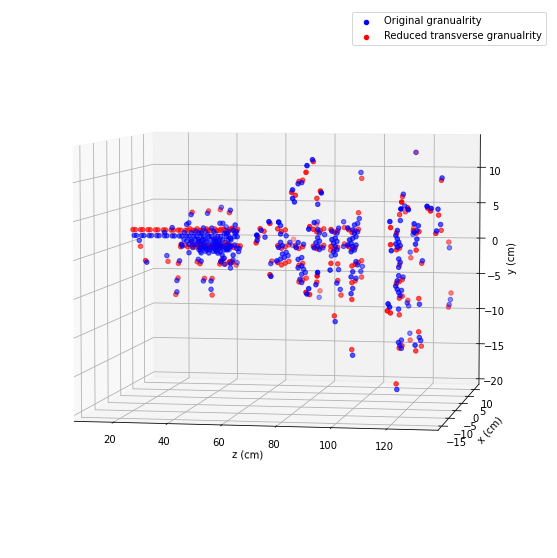

In [40]:
for i in range(4,5):#(new_rechit_values.size):

    fig = plt.figure(figsize = (15, 10)) 

    ax = plt.axes(projection ="3d") 
    ax.view_init(elev=5,azim=-80)  

    z_ori = df_dummy.rechit_z.values[i]
    x_ori = df_dummy.rechit_x.values[i]
    y_ori = df_dummy.rechit_y.values[i]
    
    z_reduced = new_rechit_values[i][2]
    x_reduced = new_rechit_values[i][0]
    y_reduced = new_rechit_values[i][1]
    

    ax.scatter3D(z_ori, x_ori, y_ori, color = "blue",label="Original granualrity")

    ax.scatter3D(z_reduced, x_reduced, y_reduced, color = "red",label="Reduced transverse granualrity")

    #ax.scatter3D(z_muon, x_muon, y_muon, color = "red",label="Muon (200GeV)")

    ax.set_xlabel('z (cm)')
    ax.set_ylabel('x (cm)')
    ax.set_zlabel('y (cm)')

    plt.title("") 
    plt.legend()
    plt.show()

In [41]:
for i in range(new_rechit_values.size):

    print(np.sum(new_rechit_values[i][3]))

3153.3154
1100.4884
4132.0054
3425.3105
1759.1191
10193.97
1260.9801
6867.8765
689.0408
5347.2397
4488.9873
2275.6846
8417.552
5757.8623
5468.357
378.0332
6151.65
2076.1692
437.26337
4335.52
2889.9897
2469.4631
6430.361
3805.378
1517.1652
5688.267
2712.9255
2441.689
7078.4272
646.54486
1516.1506
10830.767
3087.0786
11577.842
2191.224
7657.7744
1216.1721
16153.019
1186.4807
4660.9146
3682.1868
4337.899
405.01608
3391.2812
2679.6074
8760.308
17468.988
5499.212
1629.939
5341.4917
3292.9604
2770.248
4788.344
22515.236
1201.577
314.29257
3090.6277
14629.912
4333.5166
4386.748
7833.2744
14389.954
1026.4265
4434.9956
2510.0698
1791.7626
5772.146
6495.4307
3288.041
6806.1377
5141.4043
4899.4766
10818.191
8341.715
1195.5518
1315.1094
740.8627
2458.8452
21857.973
253.29178
610.9222
2510.3833
6596.676
4366.578
4749.5195
3449.102
4679.1123
794.9442
6569.7607
4293.9985
3128.8674
3842.9502
2436.0564
5654.2383
949.0398
190.64398
1143.7366
1204.411
3026.0994
3225.4233
1345.9146
2959.581
4596.64
10947.

In [42]:
df_dummy.rechit_energy.map(lambda x: np.sum(x))

entry
0       3153.315674
1       1100.488525
2       4132.004883
3       3425.310547
4       1759.119263
5      10193.969727
6       1260.979980
7       6867.876465
8        689.040771
9       5347.239258
10      4488.987305
11      2275.684570
12      8417.551758
13      5757.863281
14      5468.357422
15       378.033203
16      6151.650391
17      2076.168945
18       437.263336
19      4335.519531
20      2889.989746
21      2469.463135
22      6430.360840
23      3805.378418
24      1517.165039
25      5688.266602
26      2712.925293
27      2441.688965
28      7078.427246
29       646.544800
           ...     
470     3203.520996
471     2308.155518
472    10809.487305
473     4289.362305
474     4689.954102
475    17846.812500
476     7430.289551
477      920.322693
478    13560.669922
479     6026.416016
480     7445.314941
481    10580.443359
482     5231.079590
483     3880.887939
484     3178.571045
485     4024.328125
486     6018.416016
487     2665.551758
488     1851.9

In [43]:
a = [1,2,3,4]
b = [5,6,7,8]

In [44]:
(5 not in a) & (1 not in b)

True

In [45]:
(cell_map)

array([[-16.51998,  -8.41572,   0.     ],
       [-16.51998,  -7.29362,   0.     ],
       [-17.49174,  -6.73258,   0.     ],
       ...,
       [ 17.49174,  -5.61048, 222.     ],
       [ 17.49174,   5.61048, 223.     ],
       [ 17.49174,   6.73258, 223.     ]])

In [46]:
new_xy_cell

array([[-1.679763e+01, -6.171530e+00,  0.000000e+00],
       [-1.679763e+01,  6.171530e+00,  1.000000e+00],
       [-1.481939e+01, -1.051965e+01,  2.000000e+00],
       [-1.506234e+01, -8.135200e+00,  3.000000e+00],
       [-1.506234e+01, -5.891000e+00,  4.000000e+00],
       [-1.506234e+01, -3.646810e+00,  5.000000e+00],
       [-1.481939e+01, -1.402600e-01,  6.000000e+00],
       [-1.506234e+01,  3.085770e+00,  7.000000e+00],
       [-1.506234e+01,  5.329960e+00,  8.000000e+00],
       [-1.506234e+01,  7.574150e+00,  9.000000e+00],
       [-1.506234e+01,  1.009886e+01,  1.000000e+01],
       [-1.311881e+01, -1.150148e+01,  1.100000e+01],
       [-1.311881e+01, -9.257290e+00,  1.200000e+01],
       [-1.311881e+01, -7.013100e+00,  1.300000e+01],
       [-1.311881e+01, -4.768910e+00,  1.400000e+01],
       [-1.287587e+01, -2.103930e+00,  1.500000e+01],
       [-1.311881e+01,  8.415700e-01,  1.600000e+01],
       [-1.311881e+01,  3.085770e+00,  1.700000e+01],
       [-1.311881e+01,  5.32

In [47]:
np.save("files/reduced_transverse_granularity_cell_map_CEE_CEH", cell_map)

In [48]:
np.save("files/reduced_transverse_granularity_cell_xy_CEE_CEH", new_xy_cell)

In [1]:
pwd


'/eos/home-i00/n/nkasarag/SWAN_projects/HGCal_Particle_Identificatin_and_Energy_Reconstruction/Reducing_transverse_Granularity'